# Calorimetry likelihood stopping muons

In [33]:
%load_ext autoreload
%autoreload 2

import math
from itertools import product
import uproot
import awkward
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import binned_statistic

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from calo_likelihood import caloLikelihood
from helpers import *
from loaders import *
from plotter_lazy_array import *
from categorisation import *
from initializers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
today = '19_11_11'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/stopping_muons/
save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/stopping_muons/'

In [7]:
branches = [
    'run',
    'sub',
    'evt',
    
    'backtracked_pdg',
    'backtracked_e',
    'backtracked_purity',
    'backtracked_completeness',
    'backtracked_overlay_purity',
    'backtracked_end_process',
    
    'nplanehits_U',
    'nplanehits_V',
    'nplanehits_Y',
    'trk_score',

    'generation',

    'trk_sce_start_x',
    'trk_sce_start_y',
    'trk_sce_start_z',

    'trk_sce_end_x',
    'trk_sce_end_y',
    'trk_sce_end_z',
    
    'trk_theta',
    'trk_phi',

    'trk_dir_x',
    'trk_dir_y',
    'trk_dir_z',
    
#     'trk_pid_chipr_y',
#     'trk_pid_chipr_u',
#     'trk_pid_chipr_v',
#     'trk_pid_chimu_y',
#     'trk_bragg_p_y',
#     'trk_bragg_mu_y',

    'trk_len',
    'longest',
#     'dqdx_u',
#     'dqdx_v',
#     'dqdx_y',

    'dedx_u',
    'dedx_v',
    'dedx_y',

    'rr_u',
    'rr_v',
    'rr_y',

    'pitch_u',
    'pitch_v',
    'pitch_y',
    
#     'x_u',
#     'x_v',
#     'x_y',
    
#     'y_u',
#     'y_v',
#     'y_y',
    
#     'z_u',
#     'z_v',
#     'z_y',
    
#     'dir_x_u',
#     'dir_x_v',
#     'dir_x_y',
    
#     'dir_y_u',
#     'dir_y_v',
#     'dir_y_y',
    
#     'dir_z_u',
#     'dir_z_v',
#     'dir_z_y',
]

In [8]:
# directory = '/home/nic/Desktop/MicroBooNE/calorimetry_likelihood/v0_muons_david/'
# pot_beam_on = 4.496e+19
# n_triggers_on = 9984781.0
# n_triggers_off = 28628549.0

# file_lists = {}

# file_lists['beam_on'] = directory+'data_bnb_optfilter_C1_5e19_goodruns_mcc9.1_reco2.root'
# file_lists['beam_off'] = directory+'data_extbnb_mcc9.1_v08_00_00_16_run1_reco2.root'
# file_lists['bnb_nu'] = directory+'prodgenie_bnb_nu_uboone_overlay_mcc9.1_run1_reco2.root'
# file_lists['bnb_dirt'] = directory+'prodgenie_bnb_dirt_overlay_run1_mcc9.1_v08_00_00_16_reco2.root'

# folder = "nuselection"
# events_tree_name = "CalorimetryAnalyzer"
# pot_tree_name = "SubRun"

In [27]:
directory = '/home/nic/Desktop/MicroBooNE/calorimetry_likelihood/'
pot_beam_on = 3.972e+19
n_triggers_on = 8805057.0
n_triggers_off = 27123621.0

file_lists = {}

file_lists['beam_on'] = directory+'v03/beam_on/out.root'
file_lists['beam_off'] = directory+'v02/beam_off/out.root'
file_lists['bnb_nu'] = directory+'v02/bnb_nu/out.root'
file_lists['bnb_dirt'] = directory+'v02/bnb_dirt/out.root'

folder = "nuselection"
events_tree_name = "NeutrinoSelectionFilter"
pot_tree_name = "SubRun"

In [28]:
arrays, pot = load_data(file_lists, 
                        branches, 
                        folder, 
                        events_tree_name, 
                        pot_tree_name, 
                        labels=['beam_on', 'beam_off', 'bnb_nu', 'bnb_dirt'])

start loading beam_on
start loading beam_off
start loading bnb_nu
start loading bnb_dirt
Done!


In [29]:
scale_factors = compute_scale_factors(pot, pot_beam_on, n_triggers_on, n_triggers_off)

In [46]:
for array in list(arrays.values()):
    initialisation_for_caloriemtry_data_mc(array)

# Plot data/MC agreement with test set

In [47]:
my_plotter = plotter(arrays, scale_factors, pot_beam_on)

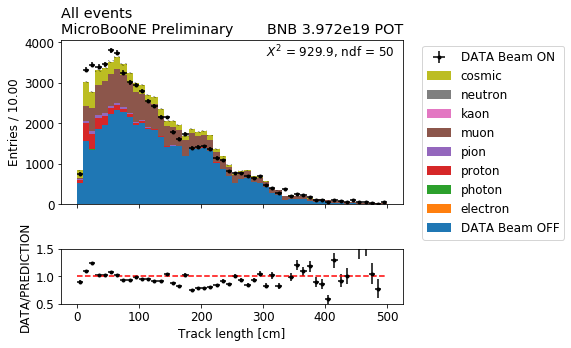

In [49]:
# save_folder = save_folder_data_mc
def sel_function(array):
    return (array['longest'] == 1) &\
            (array['trk_score'] > 0.8) &\
            (array['start_is_fiducial']) &\
            (array['end_is_fiducial'])
     
    
selection = sel_function
title = 'All events'
out = my_plotter.plot_pot_normalised_var(variable='trk_len',
                                   binning=[50, 0, 500], 
                                   categories=pdg_categories, 
                                   additional_selection=selection, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'Track length [cm]', 
                                   title=title,
                                   log=False, 
                                   subtracted=False, 
                                   onebin=False)
# plt.savefig(save_folder + 'n_pfps_allevents.png', dpi=300)

In [52]:
arrays['beam_on']['start_is_fiducial']

<ChunkedArray [False False False ... True True True] at 0x7fcefc68bd50>

In [53]:
arrays['beam_on']['trk_sce_start_x']

<ChunkedArray [0.0 0.0 0.0 ... 154.99097 153.45009 153.45009] at 0x7fcef714bb90>

In [56]:
np.array(arrays['beam_on']['backtracke'])

array([0.       , 0.       , 0.       , ..., 0.282304 , 1.3935997,
       1.3935997], dtype=float32)

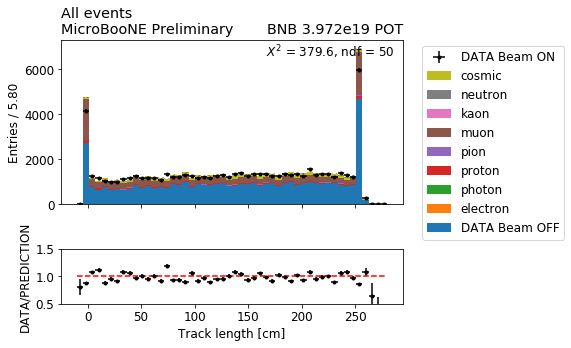

In [50]:
# save_folder = save_folder_data_mc
def sel_function(array):
    return (array['longest'] == 1) &\
            (array['trk_score'] > 0.8) &\
            (array['start_is_fiducial']) &\
            (array['end_is_fiducial'])
     
    
selection = sel_function
title = 'All events'
out = my_plotter.plot_pot_normalised_var(variable='trk_sce_start_x',
                                   binning=[50, -10, 280], 
                                   categories=pdg_categories, 
                                   additional_selection=selection, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'Track length [cm]', 
                                   title=title,
                                   log=False, 
                                   subtracted=False, 
                                   onebin=False)
# plt.savefig(save_folder + 'n_pfps_allevents.png', dpi=300)

In [ ]:
parameters_names = ['rr', 'pitch']
parameters_bin_edges = [[0., 2, 4, 7, 10, 15, 20, 30, 50, 100, 150, 200, 250, 300, 1000],
                  [.0, 0.6, 1, 1.5, 3, 30]]

dedx_var = 'dedx'
dedx_bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

plane = '_y'
for par0_edges in zip(parameters_bin_edges[0][:-1], parameters_bin_edges[0][1:]):
    for par1_edges in zip(parameters_bin_edges[1][:-1], parameters_bin_edges[1][1:]):
        def sel_function(array):
            return (array['longest'] == 1) &\
                    (array['trk_len'] > 150) &\
                    (array['trk_score'] > 0.9) &\
                    (array['start_is_fiducial']) &\
                    (array['end_is_fiducial']) &\
                    ((array[parameters_names[0]+plane]) > par0_edges[0]) &\
                    ((array[parameters_names[0]+plane]) <= par0_edges[1]) &\
                    ((array[parameters_names[1]+plane]) > par1_edges[0]) &\
                    ((array[parameters_names[1]+plane]) <= par1_edges[1])
        title = '{} < {} < {} & {} < {} < {}'.format(par0_edges[0], 
                                                     parameters_names[0]+plane,
                                                     par0_edges[1],
                                                     par1_edges[0], 
                                                     parameters_names[1]+plane,
                                                     par1_edges[1],)
        out = my_plotter.plot_pot_normalised_var(variable='dedx'+plane,
                                   binning=[30, 0, 10], 
                                   categories=pdg_categories, 
                                   additional_selection=sel_function, 
                                   prediction_datasets=['bnb_dirt', 'bnb_nu'],
                                   xlabel=r'Track dE/dx - Y [MeV/cm]', 
                                   title=title,
                                   log=False,
                                   subtracted=False, 
                                   onebin=False)
        plt.savefig(save_folder + 'muon_dedx_{}_{}_{}_{}_{}_{}.png'.format(par0_edges[0], 
                                                     parameters_names[0]+plane,
                                                     par0_edges[1],
                                                     par1_edges[0], 
                                                     parameters_names[1]+plane,
                                                     par1_edges[1]), dpi=300)
        plt.close()